In [29]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.leaky_integrate_and_fire import LIF
from neurodynex.tools import input_factory, plot_tools

nr of spikes: 0


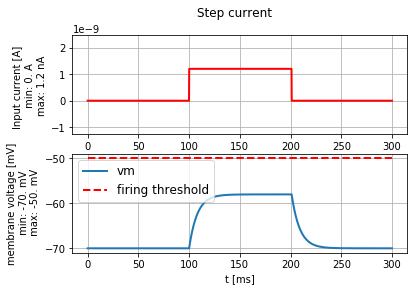

nr of spikes: 5


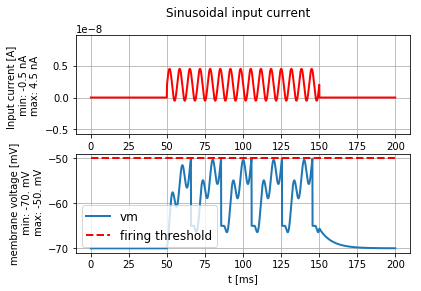

Resting potential: -70. mV
Reset voltage: -65. mV
Firing threshold: -50. mV
Membrane resistance: 10. Mohm
Membrane time-scale: 8. ms
Absolute refractory period: 2. ms


In [30]:
LIF.getting_started()
LIF.print_default_parameters()

#Parameter
#neurodynex.leaky_integrate_and_fire.LIF.simulate_LIF_neuron
#(input_current, simulation_time=5. * msecond, v_rest=-70. * mvolt, v_reset=-65. * mvolt, firing_threshold=-50. * mvolt, membrane_resistance=10. * Mohm, membrane_time_scale=8. * msecond, abs_refractory_period=2. * msecond)

#default Parameter
#V_REST = -70*b2.mV
#V_RESET = -65*b2.mV
#FIRING_THRESHOLD = -50*b2.mV
#MEMBRANE_RESISTANCE = 10. * b2.Mohm
#MEMBRANE_TIME_SCALE = 8. * b2.ms
#ABSOLUTE_REFRACTORY_PERIOD = 2.0 * b2.ms

### 2.1 Minimal Current 

Calculation

In [31]:
#Imin = Uth-Urest/R --> voir série ex 2
print("resting potential: {}".format(LIF.V_REST))
print("firing threshold: {}".format(LIF.FIRING_THRESHOLD))
print("Membrane Resistance: {}".format(LIF.MEMBRANE_RESISTANCE))
print("Imin=Uth-Urest/R: {}".format((LIF.FIRING_THRESHOLD-LIF.V_REST)/LIF.MEMBRANE_RESISTANCE))

resting potential: -70. mV
firing threshold: -50. mV
Membrane Resistance: 10. Mohm
Imin=Uth-Urest/R: 2. nA


Simulation :

nr of spikes: 0


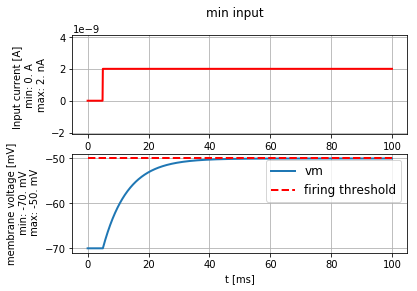

In [34]:
# create a step current with amplitude= i_min
step_current = input_factory.get_step_current(t_start=5, t_end=100, unit_time=b2.ms,amplitude= 2.* b2.namp)  # set i_min to your value

# run the LIF model.
# Note: As we do not specify any model parameters, the simulation runs with the default values
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 100 * b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

nr of spikes: 0


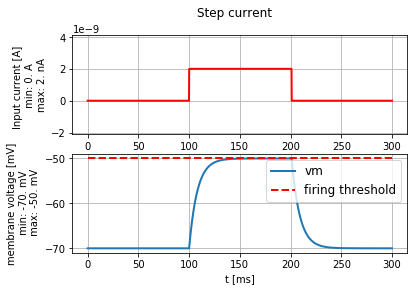

In [43]:
step_current = input_factory.get_step_current(t_start=100, t_end=200, unit_time=b2.ms,amplitude=2* b2.namp)
# run the LIF model
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time=300 * b2.ms, 
                                                         abs_refractory_period=3 * b2.ms)

# plot the membrane voltage
plot_tools.plot_voltage_and_current_traces(state_monitor, step_current,
                                               title="Step current", firing_threshold=-50 * b2.mV)
print("nr of spikes: {}".format(len(spike_monitor.t)))
plt.show()

nr of spikes: 4


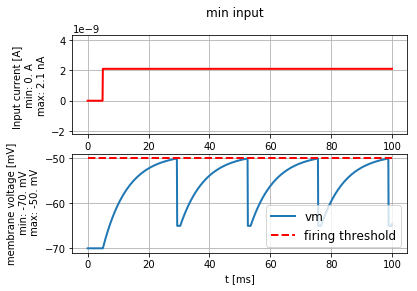

In [46]:
# create a step current with amplitude= i_min
step_current = input_factory.get_step_current(t_start=5, t_end=100, unit_time=b2.ms,amplitude= 2.1* b2.namp)  # set i_min to your value

# run the LIF model.
# Note: As we do not specify any model parameters, the simulation runs with the default values
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 100 * b2.ms,abs_refractory_period=1 * b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))

### 2.2 F-I Curve :

For a constant input current I, a LIF neuron fires regularly with firing frequency f. If the current is to small (I < I_min) f is 0Hz; for larger I the rate increases. A neuron’s firing-rate versus input-amplitude relationship is visualized in an “f-I curve”.

Sketch the f-I curve you expect to see :
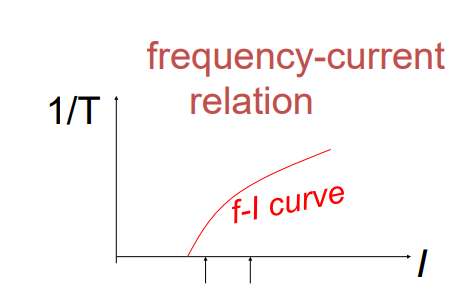
What is the maximum rate at which this neuron can fire?
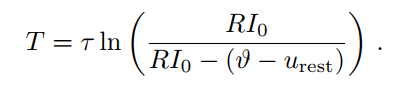
Donc le max rate est quand T tend vers 0 (car f=1/T) donc quand ln(...)=0 donc quand ... tend vers 1 donc quand Uth-Urest tend vers 0 donc quand Uth=Urest ... 
On a une refactory preriod de 3 ms donc f max = 1/3 ms = 333,3 Hz

nr of spikes: 0
nr of spikes: 64
nr of spikes: 93
nr of spikes: 111
nr of spikes: 121
nr of spikes: 129
nr of spikes: 129


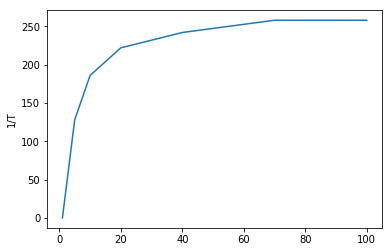

In [53]:
step_current = input_factory.get_step_current(t_start=100, t_end=600, unit_time=b2.ms,amplitude= 1* b2.namp)
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 500 * b2.ms,abs_refractory_period=3 * b2.ms)
print("nr of spikes: {}".format(spike_monitor.count[0]))
a=spike_monitor.count[0]

step_current = input_factory.get_step_current(t_start=100, t_end=600, unit_time=b2.ms,amplitude= 5* b2.namp)
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 500 * b2.ms,abs_refractory_period=3 * b2.ms)
print("nr of spikes: {}".format(spike_monitor.count[0]))
b=spike_monitor.count[0]

step_current = input_factory.get_step_current(t_start=100, t_end=600, unit_time=b2.ms,amplitude= 10* b2.namp)
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 500 * b2.ms,abs_refractory_period=3 * b2.ms)
print("nr of spikes: {}".format(spike_monitor.count[0]))
c=spike_monitor.count[0]

step_current = input_factory.get_step_current(t_start=100, t_end=600, unit_time=b2.ms,amplitude= 20* b2.namp)
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 500 * b2.ms,abs_refractory_period=3 * b2.ms)
print("nr of spikes: {}".format(spike_monitor.count[0]))
d=spike_monitor.count[0]

step_current = input_factory.get_step_current(t_start=100, t_end=600, unit_time=b2.ms,amplitude= 40* b2.namp)
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 500 * b2.ms,abs_refractory_period=3 * b2.ms)
print("nr of spikes: {}".format(spike_monitor.count[0]))
e=spike_monitor.count[0]

step_current = input_factory.get_step_current(t_start=100, t_end=600, unit_time=b2.ms,amplitude= 70* b2.namp)
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 500 * b2.ms,abs_refractory_period=3 * b2.ms)
print("nr of spikes: {}".format(spike_monitor.count[0]))
f=spike_monitor.count[0]

step_current = input_factory.get_step_current(t_start=100, t_end=600, unit_time=b2.ms,amplitude= 100* b2.namp)
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 500 * b2.ms,abs_refractory_period=3 * b2.ms)
print("nr of spikes: {}".format(spike_monitor.count[0]))
g=spike_monitor.count[0]

x=[1,5,10,20,40,70,100]
y=[a/0.5,b/0.5,c/0.5,d/0.5,e/0.5,f/0.5,g/0.5]

plt.plot(x,y)
plt.ylabel('I en namp')
plt.ylabel('1/T')
plt.show()

### 2.3. Exercise: “Experimentally” estimate the parameters of a LIF neuron

Resting potential: -66. mV
Reset voltage: -63. mV
Firing threshold: -38. mV
Membrane resistance: 13. Mohm
Membrane time-scale: 13. ms
Absolute refractory period: 5. ms


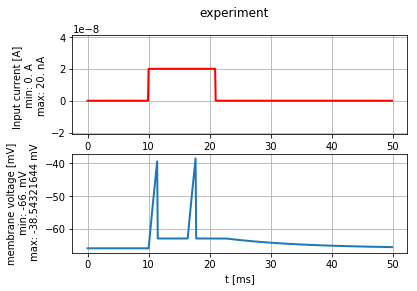

In [70]:
# get a random parameter. provide a random seed to have a reproducible experiment
random_parameters = LIF.get_random_param_set(random_seed=432)

# define your test current
test_current = input_factory.get_step_current(
    t_start=10, t_end=20, unit_time=b2.ms, amplitude= 20 * b2.namp)

# probe the neuron. pass the test current AND the random params to the function
state_monitor, spike_monitor = LIF.simulate_random_neuron(test_current, random_parameters)

# plot
plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title="experiment")

# print the parameters to the console and compare with your estimates
LIF.print_obfuscated_parameters(random_parameters)

#to find membrane resistance and membrane time scale we need to change the input current: to=RC comment on faitpor trouver param ?? 

### 2.4. Exercise: Sinusoidal input current and subthreshold response

In the subthreshold regime (no spike), the LIF neuron is a linear system and the membrane voltage is a filtered version of the input current. In this exercise we study the properties of this linear system when it gets a sinusoidal stimulus.

nr of spikes: 1


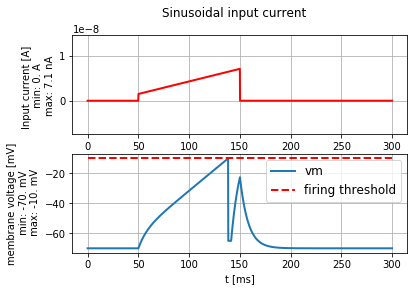

In [71]:
# Get a random parameter set
LIF.get_random_param_set(random_seed=3)
my_firing_threshold = -10 * b2.mV

# Create an input current of your choice.
sinusoidal_current = input_factory.get_ramp_current(
    500, 1500, unit_time=0.1 * b2.ms, amplitude_start=1.5 * b2.namp, 
    amplitude_end=7.1 * b2.namp, append_zero=True)

# Simulate the LIF neuron using the random parameters and your test-current
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time=300 * b2.ms, 
                                                         v_rest= -70 * b2.mV, v_reset= -65 * b2.mV, 
                                                         firing_threshold= my_firing_threshold, 
                                                         membrane_resistance= 10. * b2.Mohm,
                                                         membrane_time_scale= 8. * b2.ms,
                                                         abs_refractory_period= 3 * b2.ms)
plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current,
                                               title="Sinusoidal input current", firing_threshold=my_firing_threshold)
print("nr of spikes: {}".format(len(spike_monitor.t)))
plt.show()

nr of spikes: 0


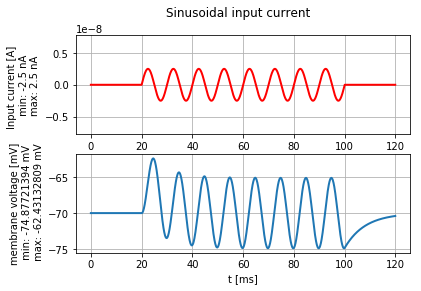

In [81]:
# note the higher resolution when discretizing the sine wave: we specify unit_time=0.1 * b2.ms
sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=100*b2.Hz,
                                            direct_current=0. * b2.namp)

# run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)

# plot the membrane voltage
plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current, title="Sinusoidal input current")
print("nr of spikes: {}".format(spike_monitor.count[0]))

2.4.2. Question
For input frequencies between 10Hz and 1kHz, plot the the resulting amplitude of subthreshold oscillations of the membrane potential vs. input frequency.

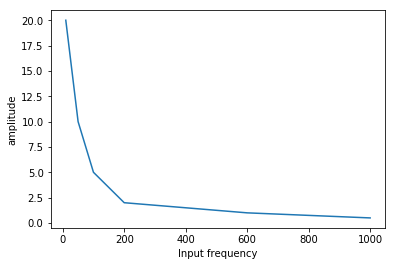

In [82]:
x=[10,50,100,200,600,1000]
y=[20,10,5,2,1,0.5]

plt.plot(x,y)
plt.xlabel('Input frequency')
plt.ylabel('amplitude')
plt.show()

2.4.3. Question
For input frequencies between 10Hz and 1kHz, plot the resulting phase shift of subthreshold oscillations of the membrane potential vs. input frequency.


comment on fait pour trouver la phase graphiquement ?

2.4.4. Question
To what type of filter (High-Pass, Low-Pass) does this correspond?

High pass